<a href="https://colab.research.google.com/github/ayush-kumar-rai/A.N.D.-Intern/blob/classification-for-Heart-Failure-disease-or-not/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing data processing and Linear Algebra libraries
import pandas as pd
import numpy as np

# Importing data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading data from CSV file and loading into df varaible
df = pd.read_csv('/content/heart.csv')
df.head(10).style.background_gradient(cmap="Reds")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.000000,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.000000,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.000000,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.500000,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.000000,Up,0


In [4]:
#Data Understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
display(df.describe(include='all'))


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [6]:
# Finding any missing values
missing_data = df.isnull().sum() / len(df) * 100
missing_data

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [7]:
for i in list(df.columns):
    print("Number of Unique values in {} :  {} ".format(i,df[i].value_counts().shape[0]))

Number of Unique values in Age :  50 
Number of Unique values in Sex :  2 
Number of Unique values in ChestPainType :  4 
Number of Unique values in RestingBP :  67 
Number of Unique values in Cholesterol :  222 
Number of Unique values in FastingBS :  2 
Number of Unique values in RestingECG :  3 
Number of Unique values in MaxHR :  119 
Number of Unique values in ExerciseAngina :  2 
Number of Unique values in Oldpeak :  53 
Number of Unique values in ST_Slope :  3 
Number of Unique values in HeartDisease :  2 


In [8]:
column_list = df.columns
for i in df.columns:
    print('Unique values in attribute: ',i,df[i].unique())
    print('*'*100)
    print('\n')

Unique values in attribute:  Age [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
****************************************************************************************************


Unique values in attribute:  Sex ['M' 'F']
****************************************************************************************************


Unique values in attribute:  ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
****************************************************************************************************


Unique values in attribute:  RestingBP [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
*********************************************************************************

In [9]:
#Data Seperation ( categorical and numerical list )
# converting the column names into lower strings
df.columns = df.columns.str.lower()


In [10]:

# categorical data
catg_lst = df.select_dtypes(include='object').columns

# numerical data
num_lst = df.select_dtypes(include=['int64','float64']).columns



In [11]:
#C) IQR Anlaysis
#The IQR indicates where the majority of the data is located. We can see where the centre 50% of the data is, which gives us a fair idea of a "typical" range for each attribute.

# categorical data list
cat_elem_range = df[catg_lst].apply(lambda x: x.value_counts().idxmax())
perc_data = df[catg_lst].apply(lambda x: round(x.value_counts().max()/len(x)*100,2))
iqr_catg_list_data = pd.DataFrame({
'Features':catg_lst,
'Majority of the values':cat_elem_range,
'percentage of values':perc_data })

# numerical data list
low_range = df[num_lst].quantile(0.25)
high_range = df[num_lst].quantile(0.75)
iqr_num_list_data = pd.DataFrame({
    'Features':num_lst,
    'Majority of the values':[f'{low_range.loc[i]} - {high_range.loc[i]}' for i in num_lst]})

iqr_num_list_data['percentage of values'] = [round( ((df[i]>=low_range.loc[i]) & (df[i]<=high_range.loc[i])).mean() *100,2)
                            for i in num_lst]


In [16]:
#Concating two dataframe
pd.merge(iqr_num_list_data, iqr_catg_list_data)
iqr_data = pd.concat([iqr_num_list_data, iqr_catg_list_data],axis=0,join='outer')
iqr_data.sort_values(by='percentage of values',ascending=False,inplace=True)
iqr_data.reset_index(drop=True, inplace=True)

# printing final IQR dataframe
iqr_data


,Features,Majority of the values,percentage of values
0,heartdisease,0.0 - 1.0,100.00
1,sex,M,78.98
2,fastingbs,0.0 - 0.0,76.69
3,oldpeak,0.0 - 1.5,74.40
4,restingecg,Normal,60.13
5,exerciseangina,N,59.59
6,restingbp,120.0 - 140.0,58.50
7,chestpaintype,ASY,54.03
8,age,47.0 - 60.0,51.96
9,maxhr,120.0 - 156.0,51.42


<Axes: >

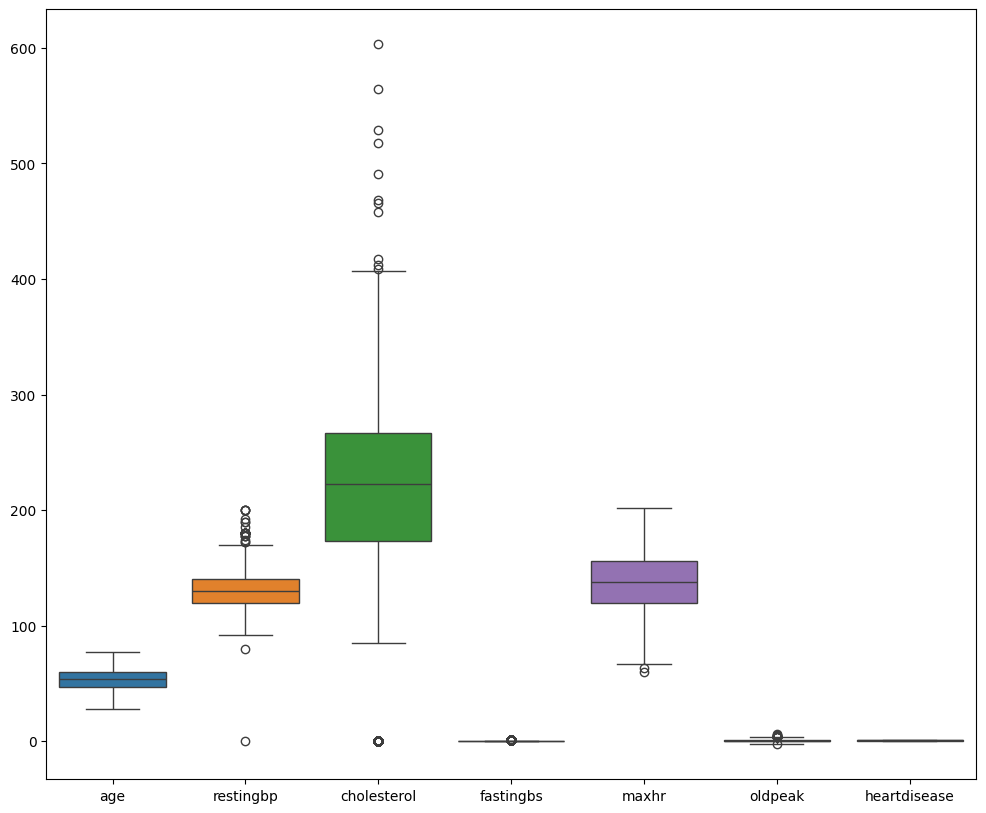

In [17]:
#box plot
fig = plt.figure(figsize=(12,10))
sns.boxplot(data = df[num_lst])

In [18]:
# Assesing the magnitude of zero in ['cholesterol','restingbp'] feature
(df[['cholesterol','restingbp']]==0).sum()

cholesterol    172
restingbp        1
dtype: int64

In [19]:
#Removing irrelevant datapoints from dataset
old_data = df.copy()
df = df[ (df['cholesterol']!=0) & (df['restingbp']!=0) ]
print('Old Data Shape: ',old_data.shape)
print('New Data Shape: ',df.shape)

Old Data Shape:  (918, 12)
New Data Shape:  (746, 12)


## Exploratory Data Analysis

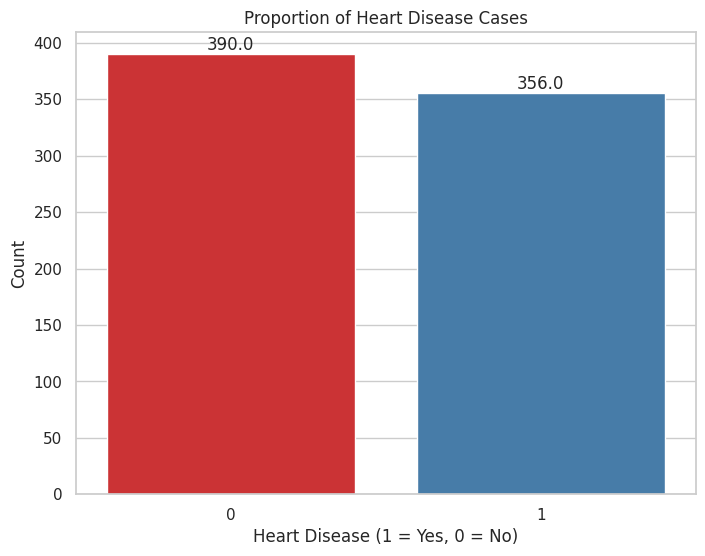

In [24]:
#Proportion of patients who have heart disease in our dataset
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='heartdisease', palette="Set1")

# Set labels and title
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.title("Proportion of Heart Disease Cases")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
# Show the plot
plt.show()

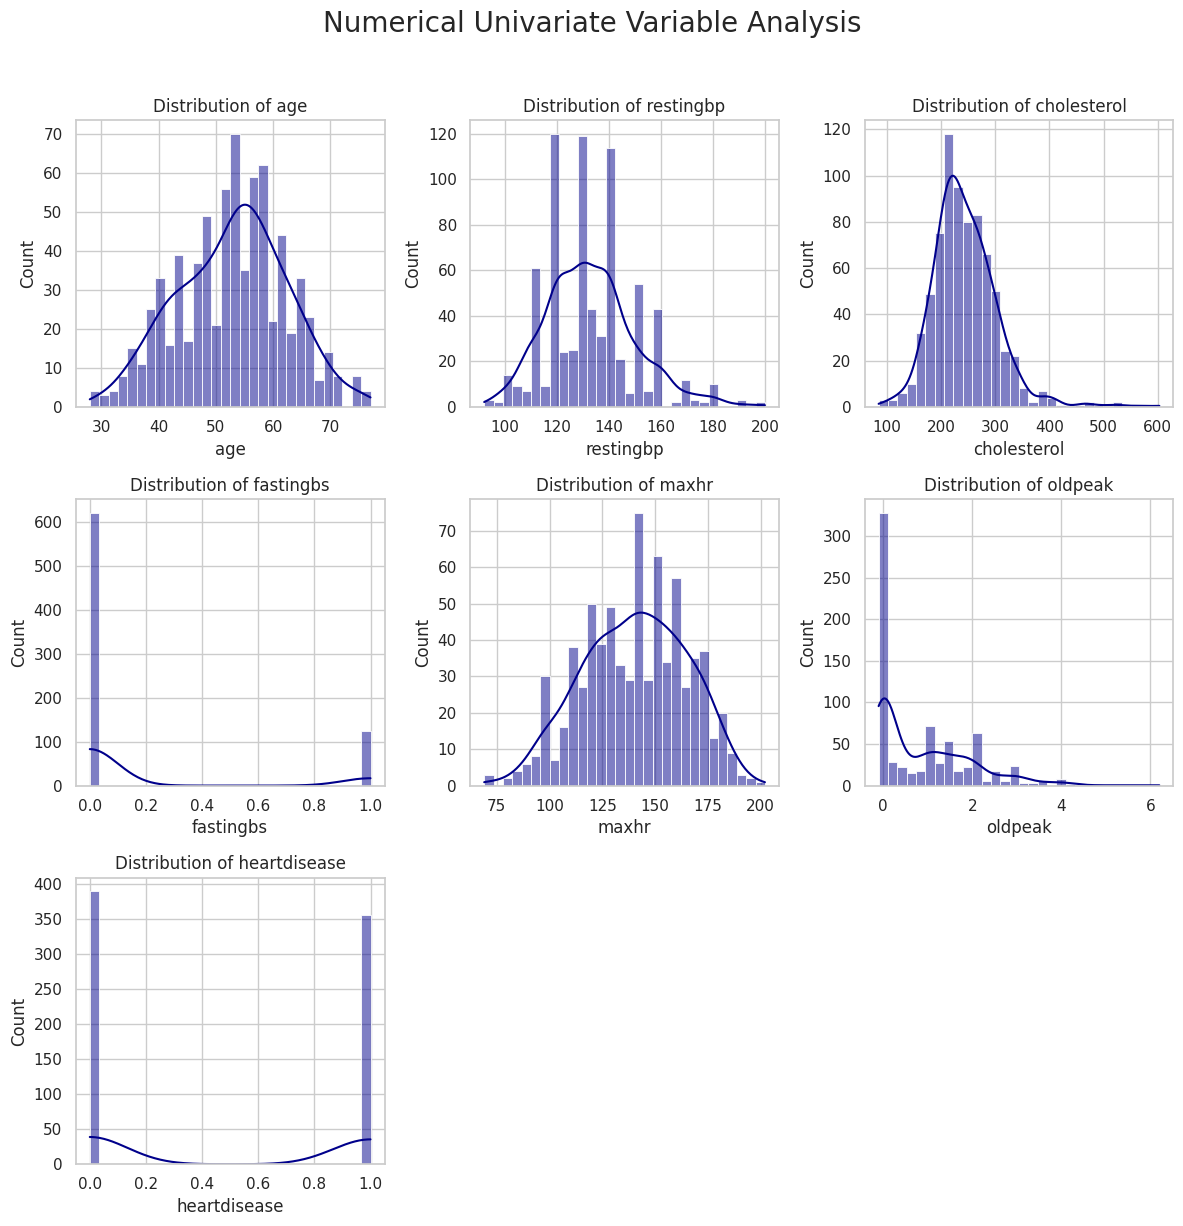

In [21]:
#Numerical Univariate Variable Analysis
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, col in enumerate(num_lst):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df[col],color='darkblue',kde=True,bins=30)
    plt.title(f'Distribution of {col}')

# removing empty subplots
num_columns = len(num_lst)
num_rows = num_columns // 3 + (1 if num_columns % 3 != 0 else 0)
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

fig.suptitle('Numerical Univariate Variable Analysis',fontsize=20,y=1.02)
plt.subplots_adjust(top=1.88)
plt.tight_layout()
plt.show()

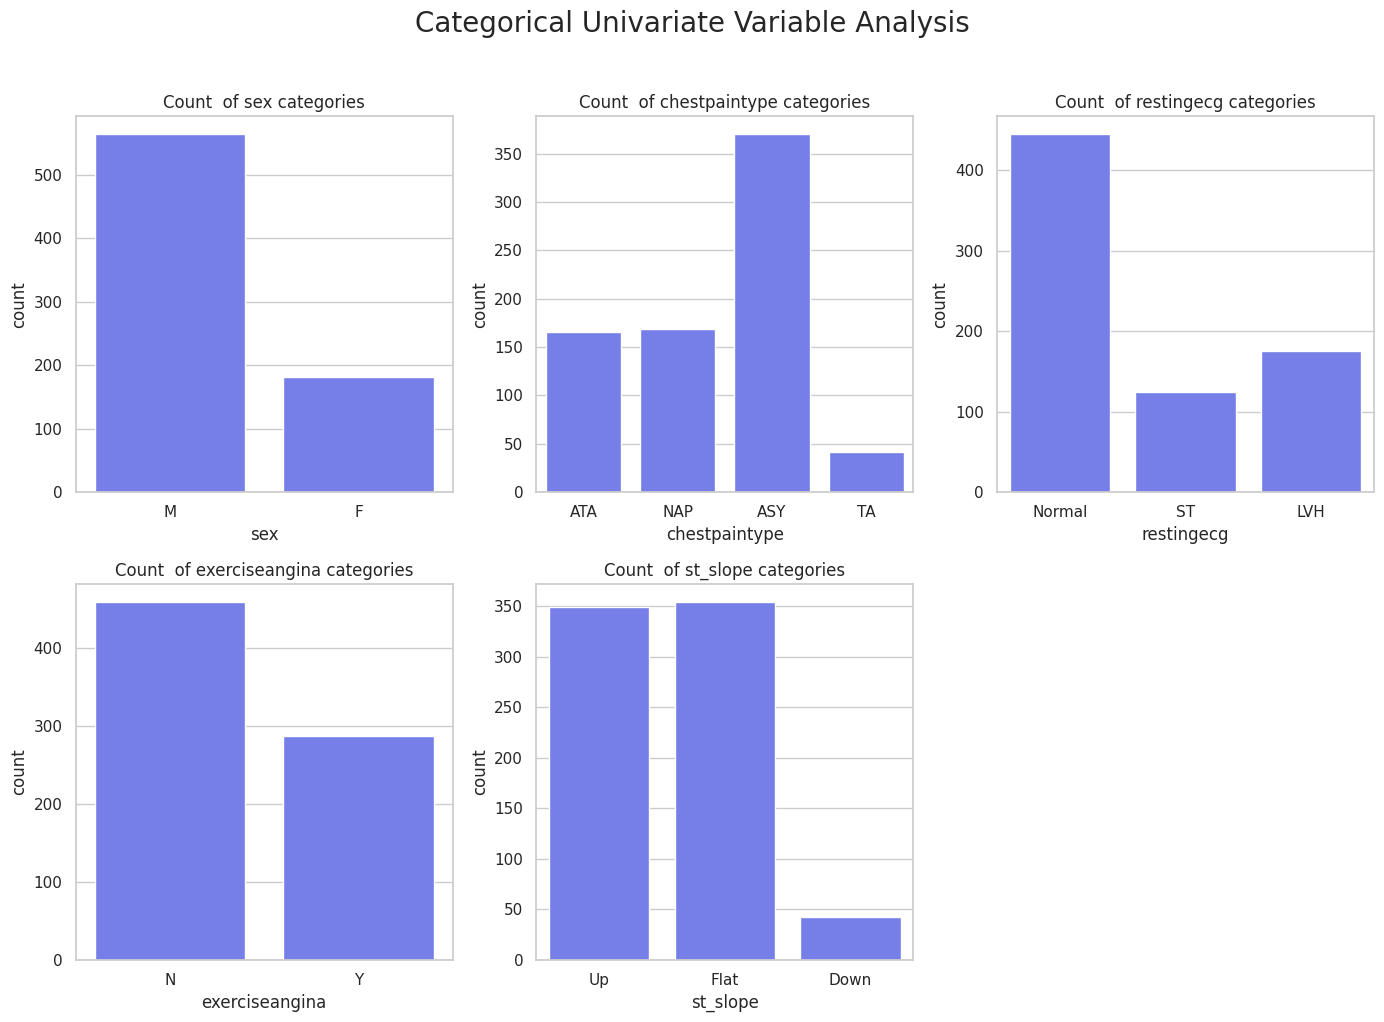

In [22]:
#Categorical Univariate Variable Analysis
color = '#636EFA'
sns.set(style="whitegrid")
fig,axes = plt.subplots(2,3,figsize=(14,10))
for i,col in enumerate(catg_lst):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df,x=df[col],color=color)
    plt.title(f'Count  of {col} categories')

# removing empty subplots
num_columns = len(catg_lst)
num_rows = num_columns // 3 + (1 if num_columns % 3 != 0 else 0)
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

fig.suptitle('Categorical Univariate Variable Analysis',fontsize=20,y=1.02)
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()

## Bivariate Analysis

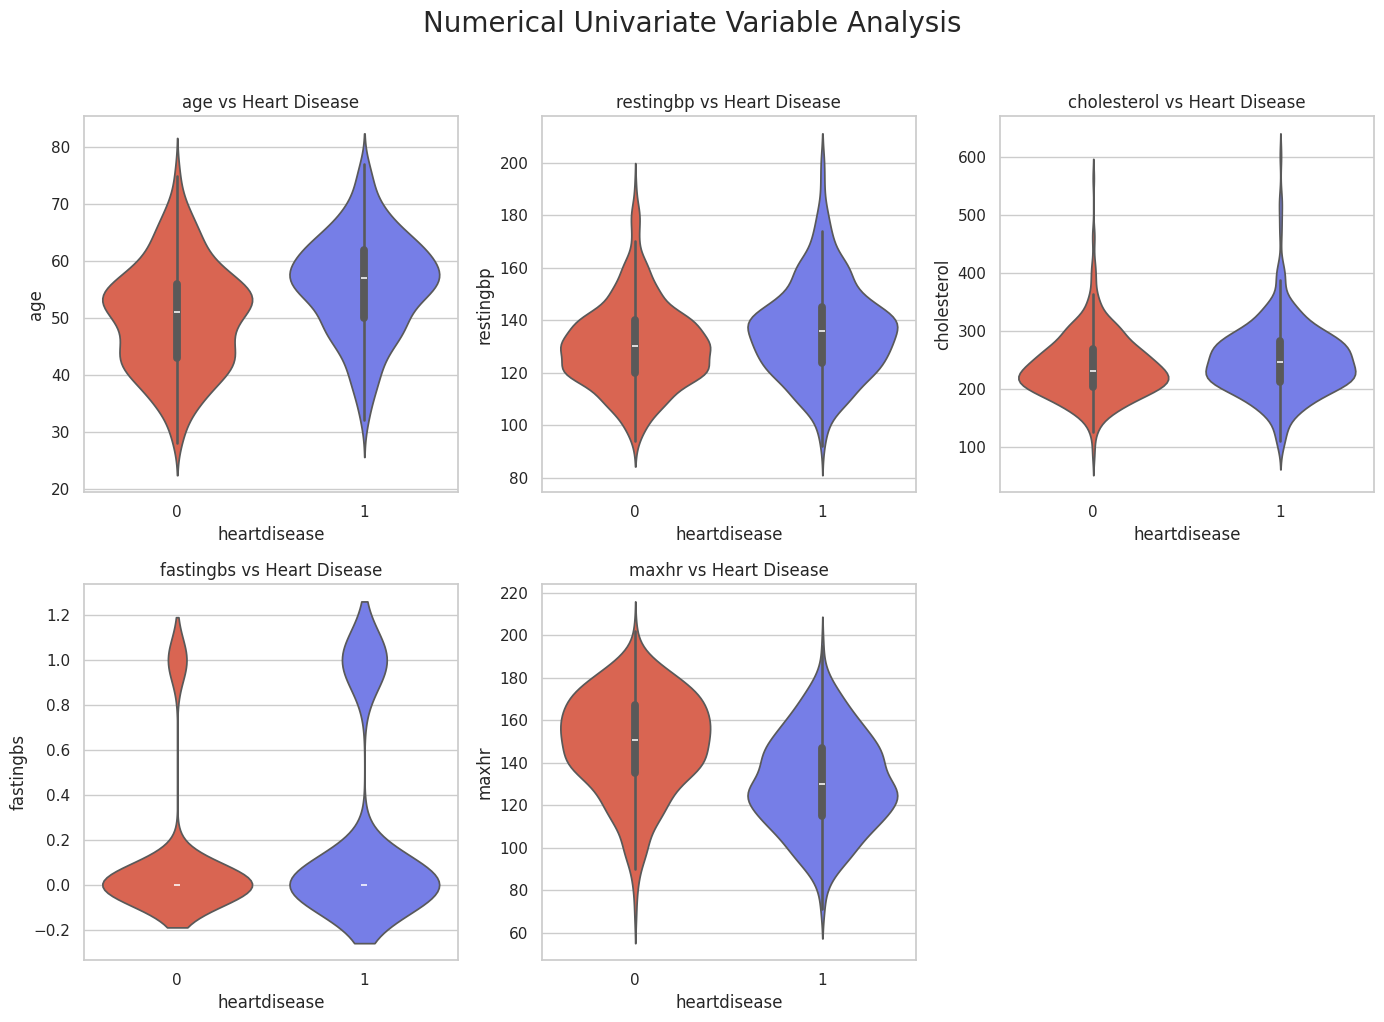

In [25]:

# Numerical Bivariate Variable Analysis
color = ['#EF553B','#636EFA']
sns.set(style="whitegrid")

fig,axes = plt.subplots(2,3,figsize=(14,10))
for i,col in enumerate(num_lst[:-1]):
    plt.subplot(2,3,i+1)
    sns.violinplot(data=df,y=df[col],x='heartdisease',palette=color)
    plt.title(f'{col} vs Heart Disease')

# removing empty subplots
num_columns = len(catg_lst)
num_rows = num_columns // 3 + (1 if num_columns % 3 != 0 else 0)
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

fig.suptitle('Numerical Univariate Variable Analysis',fontsize=20,y=1.02)
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()

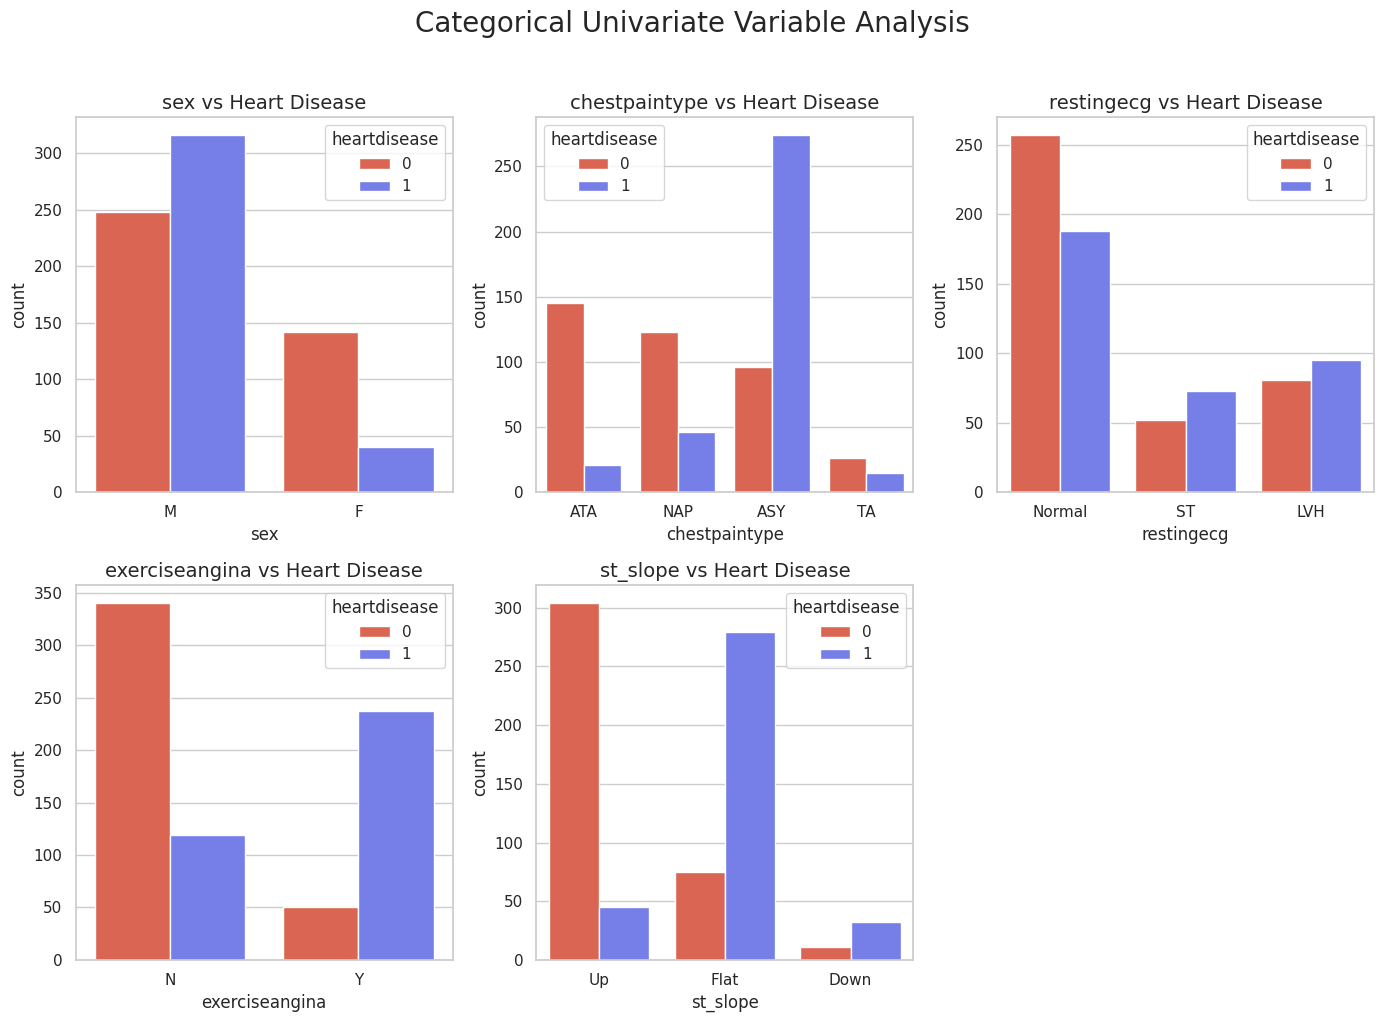

In [26]:
#Categorical Bivariate Variable Analysis

color = ['#EF553B','#636EFA']
sns.set(style="whitegrid")

fig,axes = plt.subplots(2,3,figsize=(14,10))
for i,col in enumerate(catg_lst):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df,x=df[col],hue='heartdisease',palette=color)
    plt.title(f'{col} vs Heart Disease',fontsize=14)

# removing empty subplots
num_columns = len(catg_lst)
num_rows = num_columns // 3 + (1 if num_columns % 3 != 0 else 0)
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

fig.suptitle('Categorical Univariate Variable Analysis',fontsize=20,y=1.02)
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()

## Pair Plot

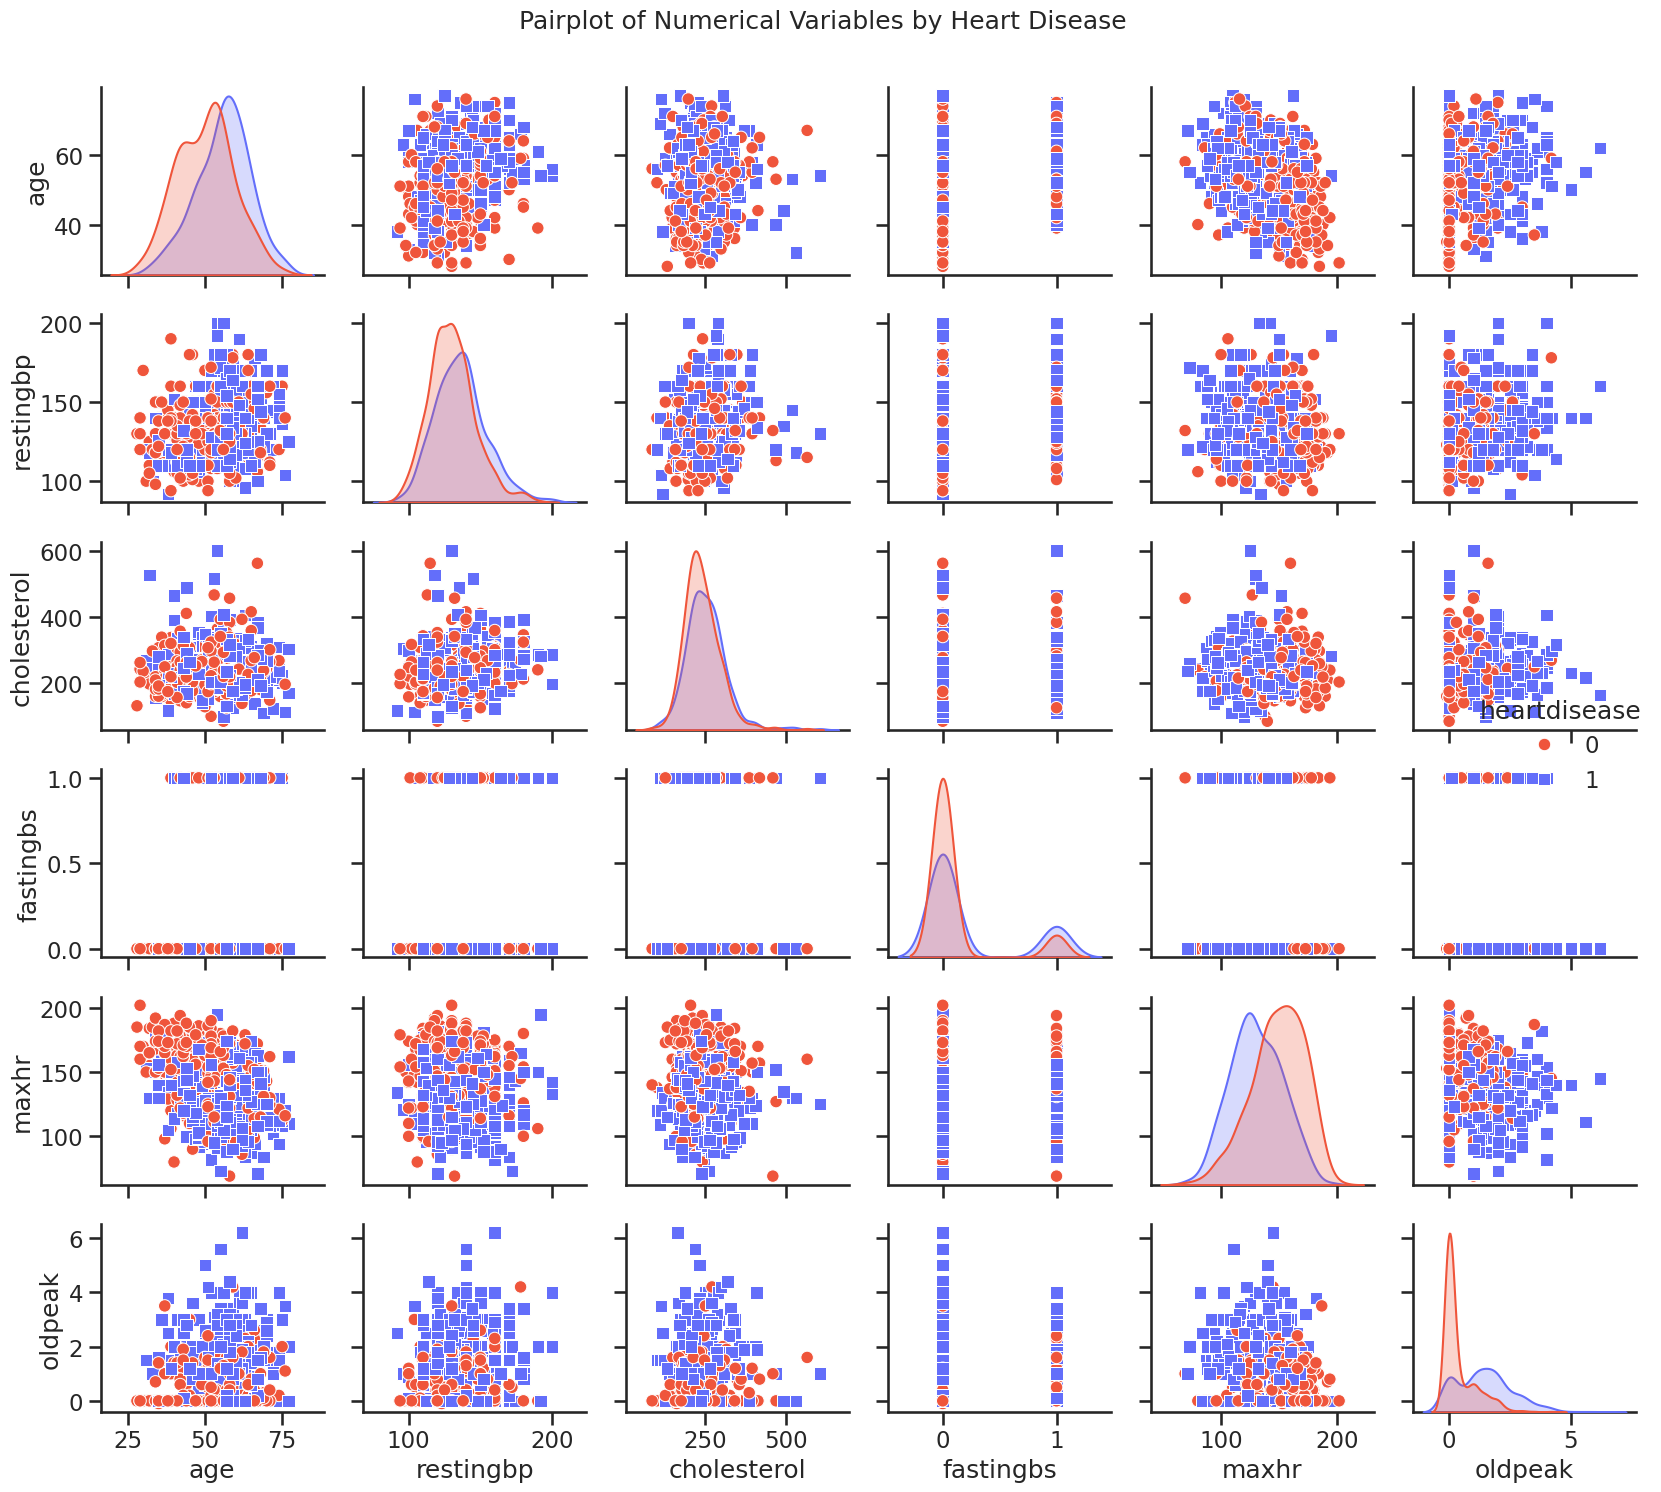

In [27]:
sns.set(style="ticks")
sns.set_context("talk")
pairplot = sns.pairplot(data=df[num_lst], hue='heartdisease', palette=color,markers=['o','s'])
plt.subplots_adjust(top=1)
pairplot.fig.suptitle("Pairplot of Numerical Variables by Heart Disease", fontsize=18,y=1)
plt.tight_layout()
plt.show()

## Multi-Variate Analysis

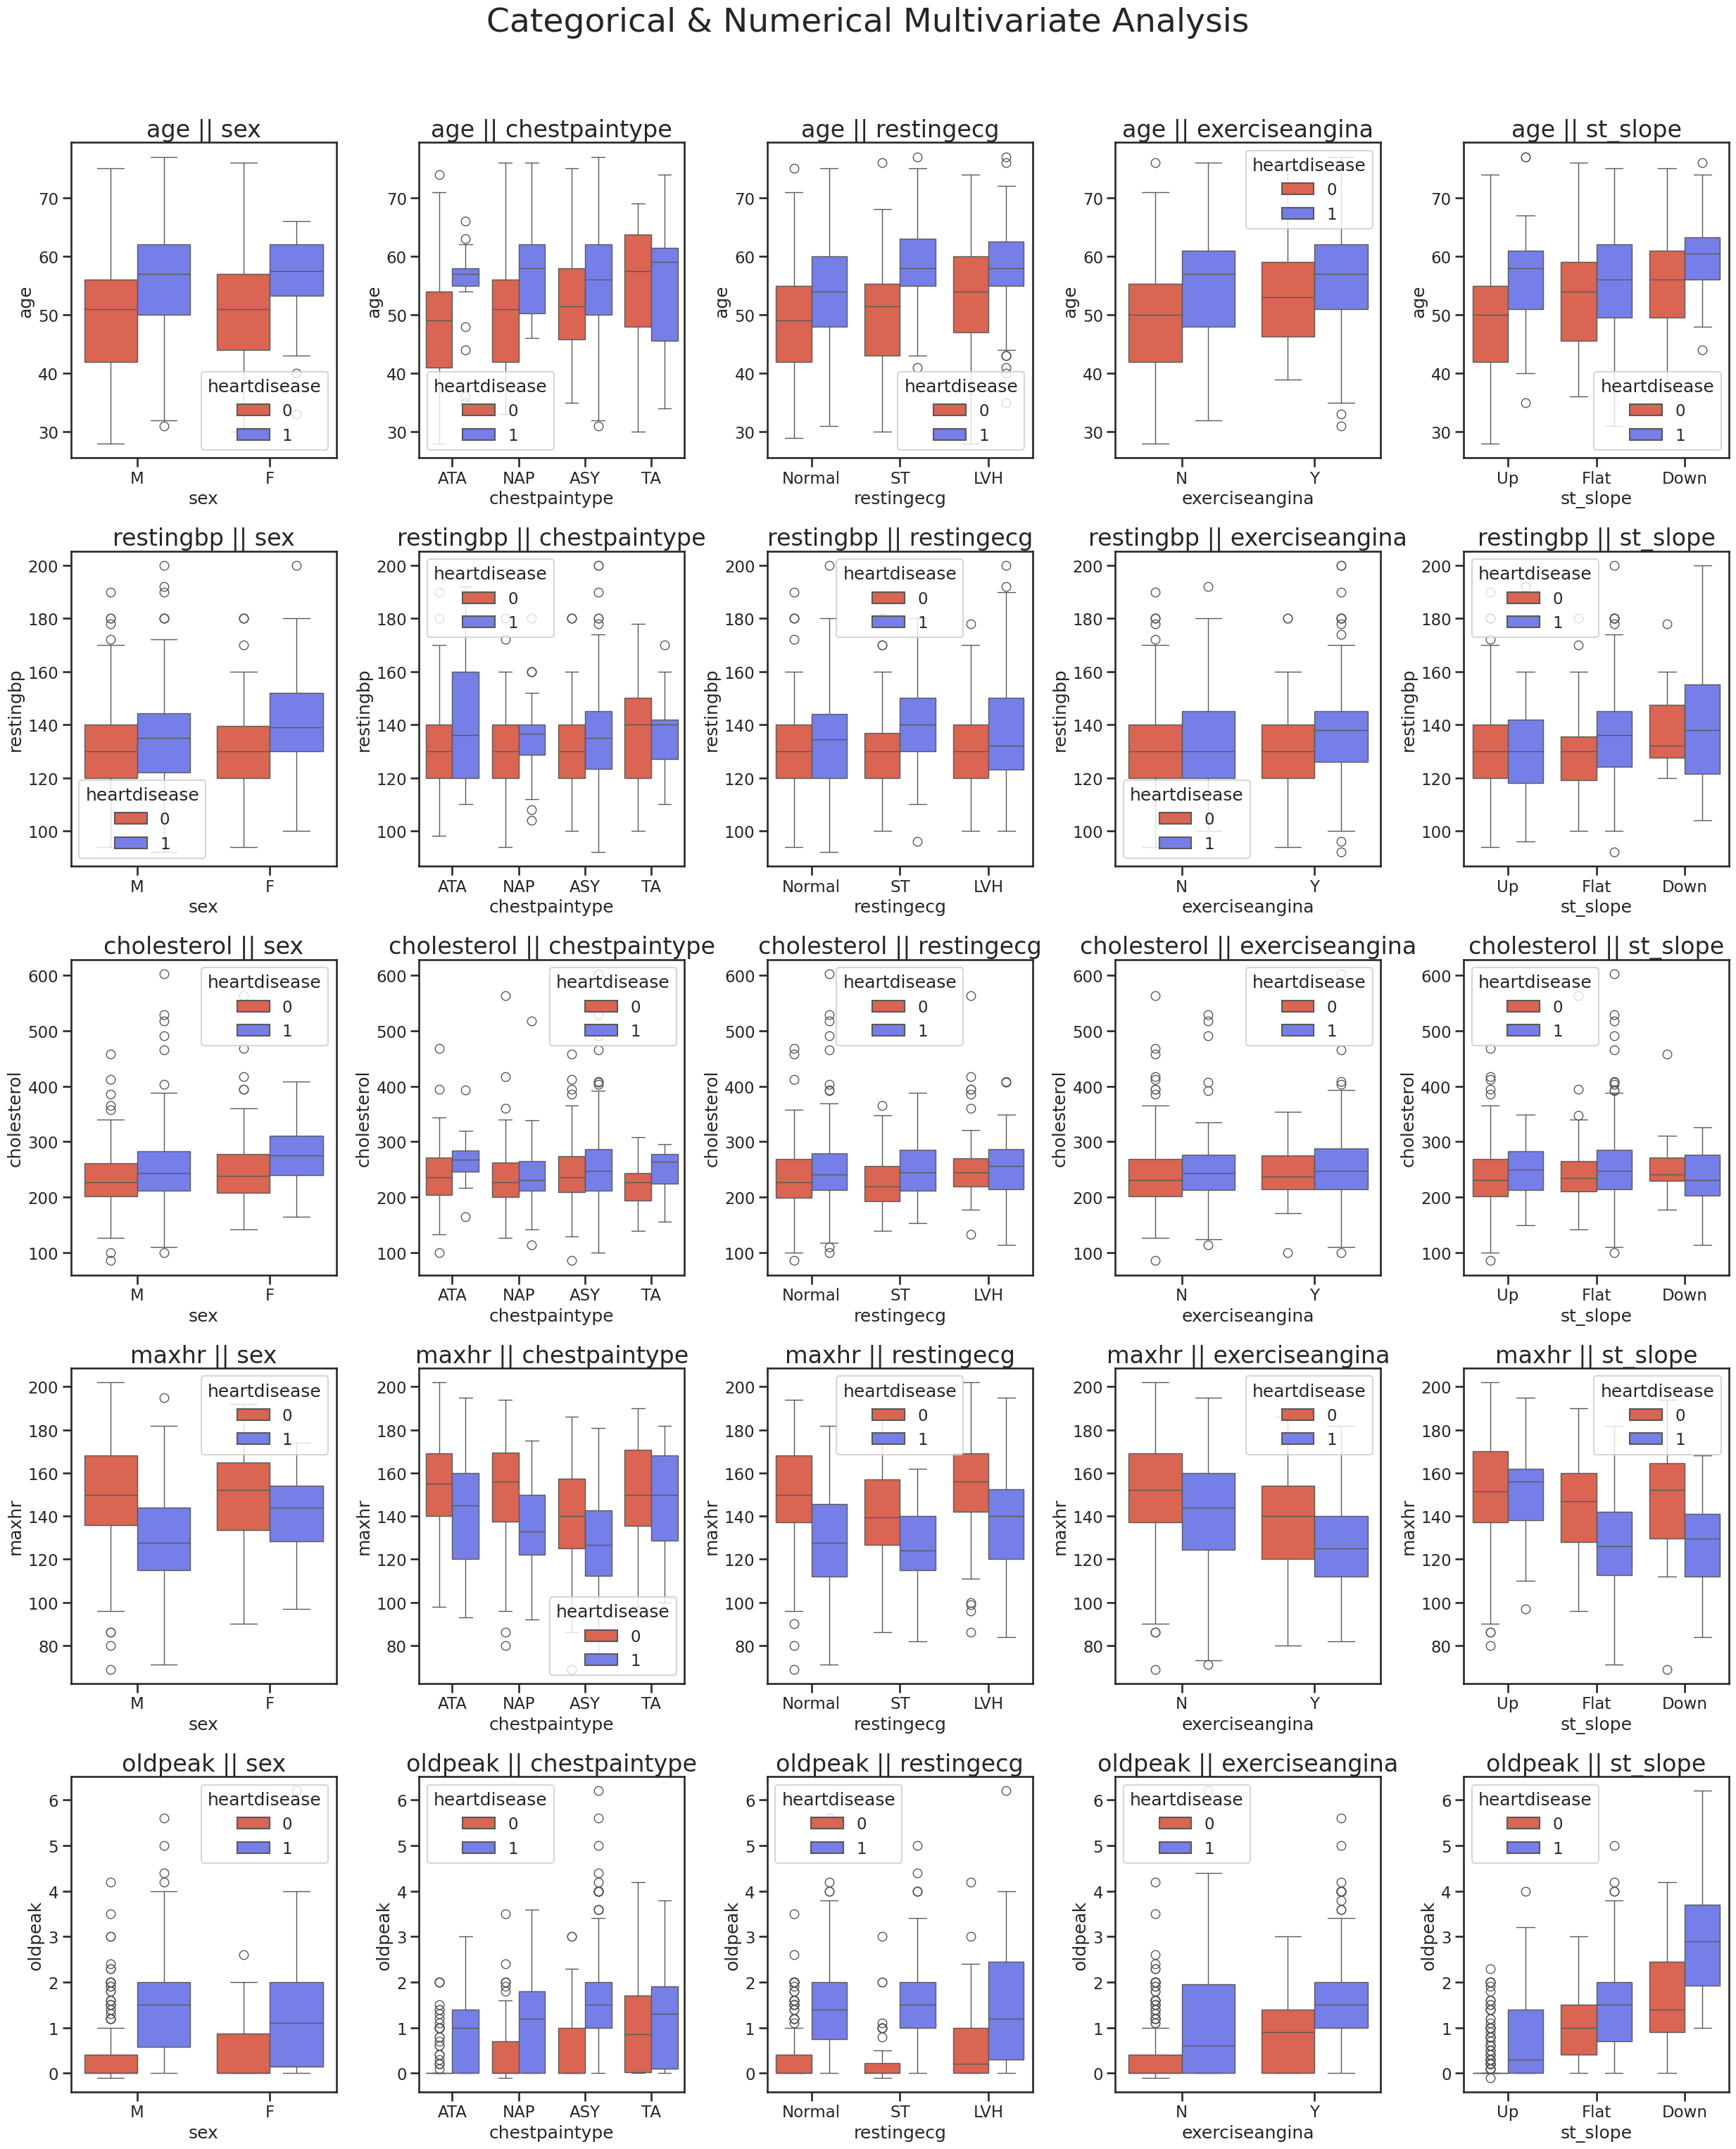

In [28]:
new_num_list = ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']

fig, ax = plt.subplots(5,5, figsize=(25, 30))
count = 0

for i,row in enumerate(new_num_list):
    for j,col in enumerate(catg_lst):
        count+=1
        plt.subplot(5,5,count)
        sns.boxplot(data = df,x=col,y=row,hue='heartdisease',palette=color)
        ax[i,j].set_title(f'{row} || {col}',fontsize=24)
        if(count==26):
            break

fig.suptitle('Categorical & Numerical Multivariate Analysis',fontsize=34,y=1.02)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.subplots_adjust(top=1.88)
plt.tight_layout()
plt.show()

## Correlation Analysis


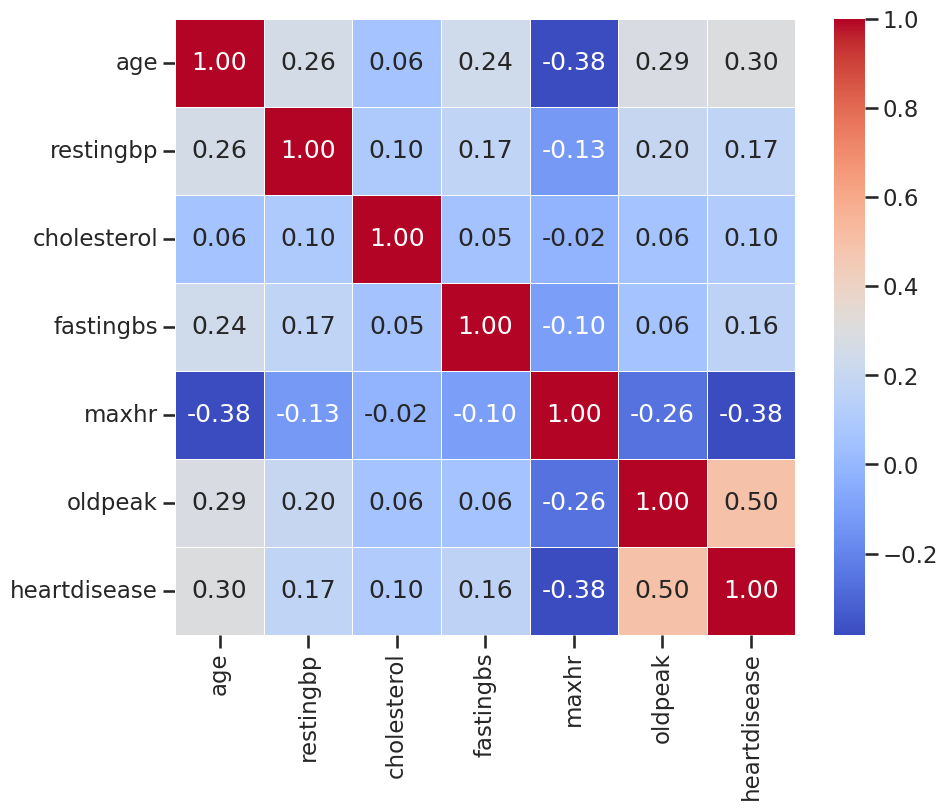

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_lst].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.show()

In [30]:
#Data Preprocessing

df_scalled = pd.get_dummies(df,drop_first = True)
df_scalled.head()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease,sex_M,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_Normal,restingecg_ST,exerciseangina_Y,st_slope_Flat,st_slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [32]:
x = df_scalled.drop(['heartdisease'],axis=1)
y = df_scalled['heartdisease']

In [33]:
#Splitting the data

# Importing data spliting data library for training and testing from given dataframe

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=21)



In [34]:
# Scalling the data
# Module for Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(x)
x_train_std=scaler.transform(x_train)
x_test_std=scaler.transform(x_test)

x_train = pd.DataFrame(x_train_std, columns=x.columns)
x_test = pd.DataFrame(x_test_std, columns=x.columns)

display(x_train.head())
display(x_test.head())

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,sex_M,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_Normal,restingecg_ST,exerciseangina_Y,st_slope_Flat,st_slope_Up
0,-0.513925,0.982980,-0.298329,-0.448652,-0.417279,0.091771,-1.760370,-0.534983,-0.541197,-0.241156,0.822438,-0.448652,1.264636,1.052304,-0.937600
1,0.012418,-0.754019,0.496747,-0.448652,-0.417279,-0.840942,-1.760370,-0.534983,1.847756,-0.241156,0.822438,-0.448652,-0.790742,-0.950295,1.066553
2,-1.566610,-1.333019,-0.924240,-0.448652,0.398792,0.091771,0.568063,-0.534983,-0.541197,-0.241156,0.822438,-0.448652,1.264636,1.052304,-0.937600
3,0.749297,0.519780,-0.484411,-0.448652,-1.233351,1.490840,0.568063,-0.534983,-0.541197,-0.241156,0.822438,-0.448652,1.264636,1.052304,-0.937600
4,-0.092851,1.561980,-0.822741,-0.448652,1.010845,-0.840942,0.568063,1.869218,-0.541197,-0.241156,0.822438,-0.448652,-0.790742,-0.950295,1.066553


,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,sex_M,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_Normal,restingecg_ST,exerciseangina_Y,st_slope_Flat,st_slope_Up
0,1.486177,1.561980,0.699745,-0.448652,-1.314958,0.558127,0.568063,-0.534983,-0.541197,-0.241156,-1.215897,-0.448652,1.264636,1.052304,-0.937600
1,-0.408656,0.403980,-0.974989,-0.448652,1.296470,-0.840942,0.568063,-0.534983,1.847756,-0.241156,0.822438,-0.448652,-0.790742,-0.950295,1.066553
2,1.380909,0.751380,0.564413,-0.448652,0.480399,-0.840942,-1.760370,-0.534983,1.847756,-0.241156,-1.215897,-0.448652,-0.790742,1.052304,-0.937600
3,1.170372,-0.464519,1.088824,-0.448652,-0.376476,0.837941,0.568063,-0.534983,1.847756,-0.241156,0.822438,-0.448652,1.264636,1.052304,-0.937600
4,0.328223,-0.175019,-0.433661,-0.448652,0.970042,-0.840942,-1.760370,-0.534983,1.847756,-0.241156,-1.215897,2.228901,-0.790742,-0.950295,1.066553


# Logistic Regression

In [35]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Library module to check model accuracy.
from sklearn.metrics import accuracy_score, roc_curve ,confusion_matrix,classification_report,f1_score
log_reg = LogisticRegression()

# Traning the data
log_reg.fit(x_train,y_train)

# Testing
y_pred = log_reg.predict(x_test)

# Model Scores
log_train_accuracy = round(log_reg.score(x_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
log_f1_score = round(f1_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",log_train_accuracy,"%")
print("Model Accuracy Score :",log_accuracy,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred))

Training Accuracy    : 86.41 %
Model Accuracy Score : 88.67 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        79
           1       0.86      0.90      0.88        71

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



In [36]:
model_table = pd.DataFrame({'Model Name':['Logistic Regression'],
                            'Training Accuracy Score':[log_train_accuracy],
                            'Model Prediction Accuracy Score':[log_accuracy],
                            'Model F1 Score':[log_f1_score]})
model_table

,Model Name,Training Accuracy Score,Model Prediction Accuracy Score,Model F1 Score
0,Logistic Regression,86.41,88.67,88.28


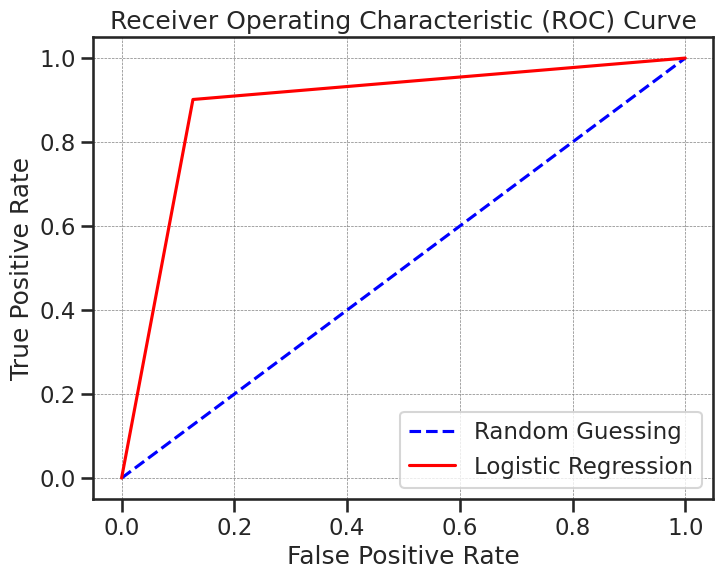

In [37]:
#ROC Curve

fpr,tpr,_ = roc_curve(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random Guessing')
plt.plot(fpr, tpr, label='Logistic Regression', color='red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()